In [1]:
from ananke.models.collection import Collection
from ananke.configurations.collection import MergeConfiguration
from ananke.schemas.event import RecordType
from ananke.configurations.events import EventRedistributionMode
from ananke.configurations.events import (
    RedistributionConfiguration,
    Interval,
    EventRedistributionMode,
)
import os
import time
import logging
from ananke.models.collection import Collection#, LegacyCollection
from ananke.configurations.collection import HDF5StorageConfiguration
logging.getLogger().setLevel(logging.DEBUG)

from ananke.configurations.collection import (
    HDF5StorageConfiguration,
    MergeConfiguration, MergeContentConfiguration,
)
from ananke.visualisation.detector import get_detector_scatter3ds
import numpy as np
import matplotlib.pyplot as plt
import time

In [12]:
x=os.listdir('data')
y=[]
for i in x:
    temp=i.split('.')
    if i[0]=='m' and temp[1]=='h5':
        y.append(i)
print(y)

['merge6.h5', 'merge1.h5', 'merge8.h5', 'merge3.h5', 'merge5.h5', 'merge7.h5', 'merge4.h5', 'merge2.h5']


DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge2.h5'
DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge2.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge2.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge2.h5'
DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge3.h5'


         time  string_id  module_id  pmt_id  record_id  type
0  286.034126          0          0       3          1    20


DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge3.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge3.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge3.h5'
DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge4.h5'


         time  string_id  module_id  pmt_id  record_id  type
0  1288.37132          0          0       0          1    20


DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge4.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge4.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge4.h5'
DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge5.h5'


         time  string_id  module_id  pmt_id  record_id  type
0  1288.37132          0          0       0          1    20


DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge5.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge5.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge5.h5'
DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge6.h5'


         time  string_id  module_id  pmt_id  record_id  type
0  1288.37132          0          0       0          1    20


DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge6.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge6.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge6.h5'
DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge7.h5'


         time  string_id  module_id  pmt_id  record_id  type
0  1288.37132          0          0       0          1    20


DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge7.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge7.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge7.h5'


         time  string_id  module_id  pmt_id  record_id  type
0  1288.37132          0          0       0          1    20


DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge8.h5'
DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge8.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge8.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge8.h5'


         time  string_id  module_id  pmt_id  record_id  type
0  1288.37132          0          0       0          1    20


In [2]:
x=time.time()
path='data/AllMerge25.h5'
config=HDF5StorageConfiguration(data_path=path,read_only=False)
C1=Collection(config)
C1.open()
hits=C1.storage.get_hits()
sources=C1.storage.get_sources()
records=C1.storage.get_records()
detector=C1.storage.get_detector()
C1.close()
print(time.time()-x)

DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/AllMerge25.h5'
DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/AllMerge25.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/AllMerge25.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/AllMerge25.h5'


3.4798431396484375


In [6]:
for i in records.df['record_id'].drop_duplicates():
    x=hits.get_by_record_ids(i).get_statistics()
    print(x)

count=70395 min=0.26391115264986875 max=1997.1571963712443
count=31881 min=0.17919764263809412 max=1989.695613221913
count=19764 min=0.7161492129308554 max=2000.1865004824276
count=86827 min=0.32772525968062216 max=1997.179399364255
count=2058 min=0.38937120907054057 max=1999.3439162654695
count=1421 min=0.7986694749537628 max=1997.6615004329958
count=2261737 min=0.38101338086095315 max=1999.126376003851
count=124127 min=0.019149159959226836 max=1507.651275387553
count=17422 min=203.66107244639392 max=847.1412385239441
count=2274 min=210.49504098832796 max=828.3379232922983
count=1378 min=0.26250875036626375 max=1997.069866096619
count=1472 min=0.6094076747784616 max=1999.8862848580068
count=1398 min=1.8532406213933594 max=1997.2795268224065


In [9]:
records.df

,location_x,location_y,location_z,orientation_x,orientation_y,orientation_z,record_id,energy,length,time,type,particle_id,duration
0,-154.788002,-33.427564,443.736516,-0.490772,0.756479,0.432298,2,32101.272279,3000.0,-1.310817,1,11,NaN
1,105.854169,-126.931308,288.042876,-0.530766,0.818127,-0.221258,4,2305.681058,3000.0,-7.363233,1,11,NaN
2,-64.012265,20.208800,-216.406359,-0.436487,0.672804,0.597339,5,62422.788087,3000.0,0.396898,1,11,NaN
3,38.257116,-41.263073,306.950846,-0.528620,0.814819,-0.237973,6,2155.494073,3000.0,-0.765969,1,11,NaN
4,20.848573,172.442361,250.813873,-0.149179,0.229946,-0.961702,7,116.686889,3000.0,-0.435048,1,11,NaN
5,170.397953,66.320281,-68.194255,0.711295,0.414265,0.567842,8,1568.839788,3000.0,-2.333434,1,11,NaN
6,-51.148253,140.009025,378.404412,0.815855,0.475162,0.329547,9,55427.232682,3000.0,-0.772910,1,11,NaN
7,102.526177,-134.645939,115.665557,0.162473,0.094626,0.982165,10,21218.160332,3000.0,-299.486303,1,11,NaN
8,84.605689,103.181461,-11.308332,0.560505,0.326443,-0.761097,12,34240.241604,3000.0,32.924684,1,11,NaN
9,-54.260814,20.774832,275.013752,-0.542991,0.587868,0.599643,13,261.866222,3000.0,44.406343,1,11,NaN


In [16]:
hits.get_by_record_ids(2).df

,time,string_id,module_id,pmt_id,record_id,type
0,696.485068,0,6,1,2,1
1,702.438868,0,6,1,2,1
2,698.629919,0,6,1,2,1
3,700.155483,0,6,1,2,1
4,706.360907,0,6,1,2,1
...,...,...,...,...,...,...
70390,1560.688407,13,18,1,2,20
70391,170.348919,13,18,7,2,20
70392,1894.315693,13,18,10,2,20
70393,587.860356,13,19,4,2,20


In [14]:
records.df

,location_x,location_y,location_z,orientation_x,orientation_y,orientation_z,record_id,energy,length,time,type,particle_id,duration
0,-154.788002,-33.427564,443.736516,-0.490772,0.756479,0.432298,2,32101.272279,3000.0,-1.310817,1,11,NaN
1,105.854169,-126.931308,288.042876,-0.530766,0.818127,-0.221258,4,2305.681058,3000.0,-7.363233,1,11,NaN
2,-64.012265,20.208800,-216.406359,-0.436487,0.672804,0.597339,5,62422.788087,3000.0,0.396898,1,11,NaN
3,38.257116,-41.263073,306.950846,-0.528620,0.814819,-0.237973,6,2155.494073,3000.0,-0.765969,1,11,NaN
4,20.848573,172.442361,250.813873,-0.149179,0.229946,-0.961702,7,116.686889,3000.0,-0.435048,1,11,NaN
5,170.397953,66.320281,-68.194255,0.711295,0.414265,0.567842,8,1568.839788,3000.0,-2.333434,1,11,NaN
6,-51.148253,140.009025,378.404412,0.815855,0.475162,0.329547,9,55427.232682,3000.0,-0.772910,1,11,NaN
7,102.526177,-134.645939,115.665557,0.162473,0.094626,0.982165,10,21218.160332,3000.0,-299.486303,1,11,NaN
8,84.605689,103.181461,-11.308332,0.560505,0.326443,-0.761097,12,34240.241604,3000.0,32.924684,1,11,NaN
9,-54.260814,20.774832,275.013752,-0.542991,0.587868,0.599643,13,261.866222,3000.0,44.406343,1,11,NaN


In [24]:
for path in y:
    config=HDF5StorageConfiguration(data_path='data/'+path,read_only=False)
    C1=Collection(config)
    C1.open()
    hits=C1.storage.get_hits()
    sources=C1.storage.get_sources()
    records=C1.storage.get_records()
    detector=C1.storage.get_detector()
    print(hits.get_statistics())
    C1.close()

DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge1.h5'
DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge1.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge1.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge1.h5'
DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge2.h5'


count=3542 min=3.4382930562235625 max=998.8263995879357


DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge2.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge2.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge2.h5'
DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge3.h5'


count=2615168 min=-1287.2706378908456 max=8784.196035269246


DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge3.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge3.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge3.h5'
DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge4.h5'


count=2622154 min=-1440.4639175644365 max=3192.1723386634694


DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge4.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge4.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge4.h5'
DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge5.h5'


count=2622154 min=0.26250875036626375 max=1999.8862848580068


DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge5.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge5.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge5.h5'
DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge6.h5'


count=2622154 min=0.019149159959226836 max=2000.1865004824276


DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge6.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge6.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge6.h5'
DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge7.h5'


count=2622154 min=0.019149159959226836 max=2000.1865004824276


DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge7.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge7.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge7.h5'
DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge8.h5'


count=2622154 min=0.26250875036626375 max=3197.999146383178


DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge8.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge8.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge8.h5'


count=2622154 min=0.26250875036626375 max=3197.999146383178


In [26]:
config=HDF5StorageConfiguration(data_path='data/merge8.h5',read_only=False)
C1=Collection(config)
C1.open()
hits=C1.storage.get_hits()
sources=C1.storage.get_sources()
records=C1.storage.get_records()
detector=C1.storage.get_detector()
C1.close()

DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/merge8.h5'
DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/merge8.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/merge8.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/merge8.h5'


In [30]:
config=HDF5StorageConfiguration(data_path='data/HexCascadeBenchMark.h5',read_only=False)
C2=Collection(config)
C2.open()
hits2=C2.storage.get_hits()
sources2=C2.storage.get_sources()
records2=C2.storage.get_records()
detector2=C2.storage.get_detector()
C2.close()

DEBUG:root:Get <class 'ananke.models.event.Hits'> with key hits at 'data/HexCascadeBenchMark.h5'
DEBUG:root:Get <class 'ananke.models.event.Sources'> with key sources at 'data/HexCascadeBenchMark.h5'
DEBUG:root:Get <class 'ananke.models.event.Records'> with key records at 'data/HexCascadeBenchMark.h5'
DEBUG:root:Get <class 'ananke.models.detector.Detector'> with key detector at 'data/HexCascadeBenchMark.h5'


In [ ]:
hits.get_statistics()

In [31]:
records.df

,location_x,location_y,location_z,orientation_x,orientation_y,orientation_z,record_id,energy,length,time,type,particle_id,duration
0,-154.788002,-33.427564,443.736516,-0.490772,0.756479,0.432298,2,32101.272279,3000.0,395.866729,1,11,NaN
1,105.854169,-126.931308,288.042876,-0.530766,0.818127,-0.221258,4,2305.681058,3000.0,268.796464,1,11,NaN
2,-64.012265,20.208800,-216.406359,-0.436487,0.672804,0.597339,5,62422.788087,3000.0,1074.223819,1,11,NaN
3,38.257116,-41.263073,306.950846,-0.528620,0.814819,-0.237973,6,2155.494073,3000.0,491.587890,1,11,NaN
4,20.848573,172.442361,250.813873,-0.149179,0.229946,-0.961702,7,116.686889,3000.0,584.056814,1,11,NaN
5,170.397953,66.320281,-68.194255,0.711295,0.414265,0.567842,8,1568.839788,3000.0,1198.004212,1,11,NaN
6,-51.148253,140.009025,378.404412,0.815855,0.475162,0.329547,9,55427.232682,3000.0,571.520071,1,11,NaN
7,102.526177,-134.645939,115.665557,0.162473,0.094626,0.982165,10,21218.160332,3000.0,28.723740,1,11,NaN
8,84.605689,103.181461,-11.308332,0.560505,0.326443,-0.761097,12,34240.241604,3000.0,356.666123,1,11,NaN
9,-54.260814,20.774832,275.013752,-0.542991,0.587868,0.599643,13,261.866222,3000.0,357.921004,1,11,NaN


In [32]:
records2.df

,location_x,location_y,location_z,orientation_x,orientation_y,orientation_z,record_id,energy,length,time,type,particle_id,duration
0,-154.788002,-33.427564,443.736516,-0.490772,0.756479,0.432298,2,32101.272279,3000.0,0.0,1,11,NaN
1,105.854169,-126.931308,288.042876,-0.530766,0.818127,-0.221258,4,2305.681058,3000.0,0.0,1,11,NaN
2,-64.012265,20.208800,-216.406359,-0.436487,0.672804,0.597339,5,62422.788087,3000.0,0.0,1,11,NaN
3,38.257116,-41.263073,306.950846,-0.528620,0.814819,-0.237973,6,2155.494073,3000.0,0.0,1,11,NaN
4,20.848573,172.442361,250.813873,-0.149179,0.229946,-0.961702,7,116.686889,3000.0,0.0,1,11,NaN
5,170.397953,66.320281,-68.194255,0.711295,0.414265,0.567842,8,1568.839788,3000.0,0.0,1,11,NaN
6,-51.148253,140.009025,378.404412,0.815855,0.475162,0.329547,9,55427.232682,3000.0,0.0,1,11,NaN
7,102.526177,-134.645939,115.665557,0.162473,0.094626,0.982165,10,21218.160332,3000.0,0.0,1,11,NaN
8,84.605689,103.181461,-11.308332,0.560505,0.326443,-0.761097,12,34240.241604,3000.0,0.0,1,11,NaN
9,-54.260814,20.774832,275.013752,-0.542991,0.587868,0.599643,13,261.866222,3000.0,0.0,1,11,NaN


In [43]:
hits.get_by_record_ids(2).df.sort_values(by='time')

,time,string_id,module_id,pmt_id,record_id,type
70139,397.441457,11,7,2,2,20
69502,397.452482,4,18,1,2,20
69166,398.219126,1,8,9,2,20
70213,398.899605,12,3,3,2,20
69112,399.426211,0,16,12,2,20
...,...,...,...,...,...,...
70033,2387.083166,10,5,3,2,20
70202,2390.831979,12,0,12,2,20
69753,2393.346949,7,4,10,2,20
69832,2393.695601,7,19,10,2,20


In [42]:
hits2.get_by_record_ids(2).df.sort_values(by='time')

,time,string_id,module_id,pmt_id,record_id,type
12409,222.023353,0,9,10,2,1
12401,222.204451,0,9,10,2,1
18816,222.325960,0,9,11,2,1
12444,222.497834,0,9,10,2,1
12398,222.524701,0,9,10,2,1
...,...,...,...,...,...,...
68958,1326.623394,10,13,8,2,1
68976,1327.501383,10,13,10,2,1
68969,1328.016172,10,13,10,2,1
68981,1328.430725,10,13,12,2,1


/u/arego/.local/lib/python3.10/site-packages/ananke/visualisation/detector.py:81: PerformanceWarning:

indexing past lexsort depth may impact performance.



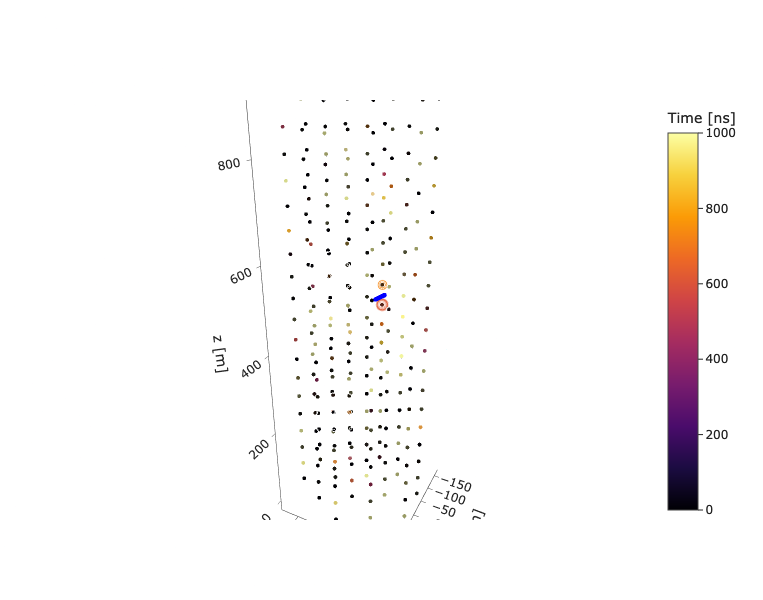

In [46]:
fig = get_detector_scatter3ds(
        detector,
        include_modules=False,
        include_pmts=True,
        hits=hits.get_by_record_ids(2),
        sources=sources.get_by_record_ids(2)
    )
fig.show()

/u/arego/.local/lib/python3.10/site-packages/ananke/visualisation/detector.py:81: PerformanceWarning:

indexing past lexsort depth may impact performance.

/u/arego/.local/lib/python3.10/site-packages/ananke/visualisation/detector.py:81: PerformanceWarning:

indexing past lexsort depth may impact performance.

/u/arego/.local/lib/python3.10/site-packages/ananke/visualisation/detector.py:81: PerformanceWarning:

indexing past lexsort depth may impact performance.

/u/arego/.local/lib/python3.10/site-packages/ananke/visualisation/detector.py:81: PerformanceWarning:

indexing past lexsort depth may impact performance.

/u/arego/.local/lib/python3.10/site-packages/ananke/visualisation/detector.py:81: PerformanceWarning:

indexing past lexsort depth may impact performance.

/u/arego/.local/lib/python3.10/site-packages/ananke/visualisation/detector.py:81: PerformanceWarning:

indexing past lexsort depth may impact performance.

/u/arego/.local/lib/python3.10/site-packages/ananke/visualisatio

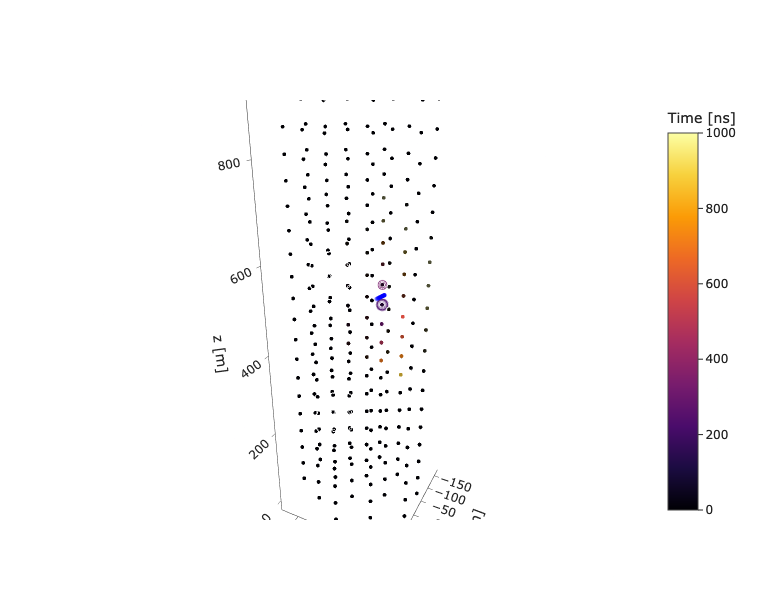

In [47]:
fig = get_detector_scatter3ds(
        detector,
        include_modules=False,
        include_pmts=True,
        hits=hits2.get_by_record_ids(2),
        sources=sources2.get_by_record_ids(2)
    )
fig.show()

In [48]:
sources.get_by_record_ids(2).df

,location_x,location_y,location_z,orientation_x,orientation_y,orientation_z,record_id,time,number_of_photons,type
0,-154.917831,-33.467045,443.891846,-0.490772,0.756479,0.432298,2,396.203629,24,0
1,-155.066360,-33.318962,443.926727,-0.490772,0.756479,0.432298,2,396.870757,6641,0
2,-155.078796,-33.137371,444.057495,-0.490772,0.756479,0.432298,2,397.537885,150216,0
3,-155.257141,-32.909775,443.919373,-0.490772,0.756479,0.432298,2,398.205013,1194543,0
4,-155.225632,-32.659222,443.979370,-0.490772,0.756479,0.432298,2,398.872142,5361027,0
...,...,...,...,...,...,...,...,...,...,...
367,-166.375656,-15.296020,454.141266,-0.490772,0.756479,0.432298,2,475.591880,0,0
368,-166.462479,-15.066141,454.103088,-0.490772,0.756479,0.432298,2,476.259010,0,0
369,-166.575027,-14.953529,454.240906,-0.490772,0.756479,0.432298,2,476.926131,0,0
370,-166.884140,-14.845779,454.164062,-0.490772,0.756479,0.432298,2,477.593261,0,0


In [51]:
1-0.3+396.2

396.9

In [49]:
sources2.get_by_record_ids(2).df

,location_x,location_y,location_z,orientation_x,orientation_y,orientation_z,record_id,time,number_of_photons,type
0,-154.917831,-33.467045,443.891846,-0.490772,0.756479,0.432298,2,0.336900,24,0
1,-155.066360,-33.318962,443.926727,-0.490772,0.756479,0.432298,2,1.004028,6641,0
2,-155.078796,-33.137371,444.057495,-0.490772,0.756479,0.432298,2,1.671156,150216,0
3,-155.257141,-32.909775,443.919373,-0.490772,0.756479,0.432298,2,2.338284,1194543,0
4,-155.225632,-32.659222,443.979370,-0.490772,0.756479,0.432298,2,3.005413,5361027,0
...,...,...,...,...,...,...,...,...,...,...
367,-166.375656,-15.296020,454.141266,-0.490772,0.756479,0.432298,2,79.725151,0,0
368,-166.462479,-15.066141,454.103088,-0.490772,0.756479,0.432298,2,80.392281,0,0
369,-166.575027,-14.953529,454.240906,-0.490772,0.756479,0.432298,2,81.059402,0,0
370,-166.884140,-14.845779,454.164062,-0.490772,0.756479,0.432298,2,81.726532,0,0


In [53]:
s1=sources.get_by_record_ids(2).df
s2=sources2.get_by_record_ids(2).df
x=s1['time']-s2['time']

In [55]:
x.drop_duplicates()

0    395.866729
Name: time, dtype: float64